# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_SGP_cat.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J001940.989-345722.272,4.92078753686,-34.9561865698,1.63255,3.99665,0.46531,1.9204,5.06505,0.459693,2.45386,6.20871,0.573348,0.349812,0.306827,-1.77416,4.21854,5.29316,3.7742,0.99909,0.999431,0.9983,2000.0,2000.0,2000.0,0.0,0.0,0.0
HELP_J001652.816-345723.191,4.22006708911,-34.956441814,3.23338,6.4456,1.02295,2.23723,5.09528,0.613182,2.01371,4.90124,0.531254,-3.97507,-5.38986,-4.3829,2.94425,4.13227,4.43288,0.999506,1.0,0.99905,2000.0,2000.0,2000.0,0.0,0.001,0.0
HELP_J001910.576-345557.326,4.79406719405,-34.9325904725,2.37321,5.39327,0.725757,4.75051,8.71094,1.58064,2.43464,5.54121,0.659595,0.0198151,-1.34212,-4.06261,4.97191,5.4966,5.80633,0.998301,0.998751,0.999071,2000.0,2000.0,2000.0,0.0,0.0,0.003
HELP_J001911.933-345537.381,4.79972115721,-34.9270503111,4.27961,8.8788,1.31558,2.12981,4.78147,0.578806,5.01855,9.55156,1.68188,0.0198151,-1.34212,-4.06261,4.97191,5.4966,5.80633,1.00178,0.99983,0.999587,2000.0,2000.0,2000.0,0.0,0.0,0.004
HELP_J001912.079-345642.101,4.80033113478,-34.9450280731,11.6953,17.0683,6.91563,16.5923,21.7577,11.3884,13.0752,19.3293,7.16844,0.0198151,-1.34212,-4.06261,4.97191,5.4966,5.80633,0.999095,0.999199,0.998398,2000.0,2000.0,2000.0,0.0,0.0,0.001
HELP_J001912.533-345432.342,4.80222195471,-34.9089838178,2.37091,5.47601,0.744225,2.80501,6.02419,0.723292,3.83578,8.29671,1.07944,0.0198151,-1.34212,-4.06261,4.97191,5.4966,5.80633,0.998927,0.99909,0.999363,2000.0,2000.0,2000.0,0.0,0.0,0.007
HELP_J001913.090-345442.161,4.80454014574,-34.9117112986,2.14508,5.15553,0.562102,4.5055,8.65665,1.38541,2.67112,6.12287,0.794174,0.0198151,-1.34212,-4.06261,4.97191,5.4966,5.80633,0.999958,0.998579,0.999126,2000.0,2000.0,2000.0,0.0,0.0,0.008
HELP_J001914.856-345711.159,4.81190167077,-34.9530996734,8.29986,13.3264,3.62512,5.27053,9.37973,1.83592,2.90186,6.44294,0.737726,0.0198151,-1.34212,-4.06261,4.97191,5.4966,5.80633,0.999895,0.99964,0.998821,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

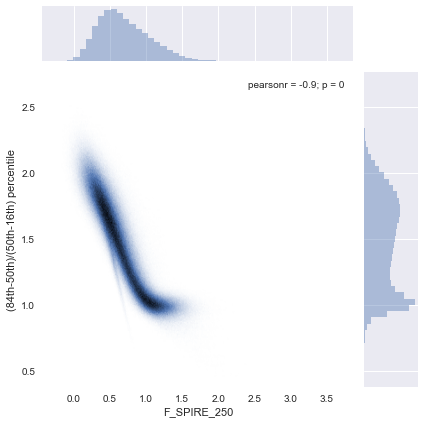

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 6mJy

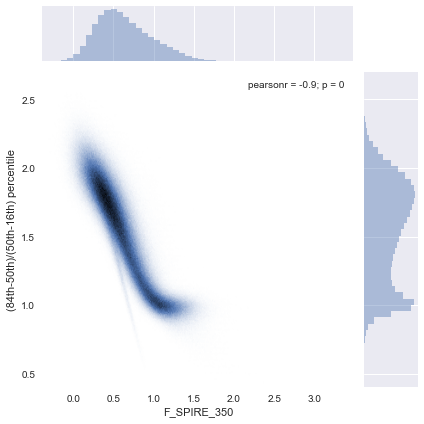

In [8]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 6mJy

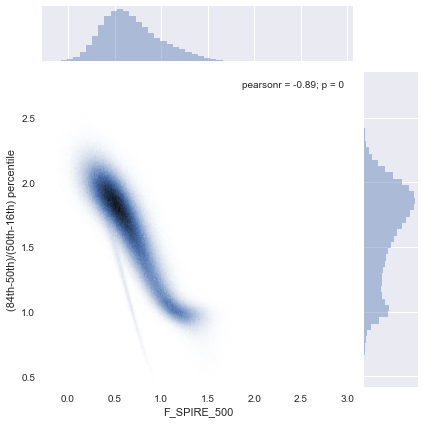

In [9]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 9mJy

## Add flag to catalogue

In [11]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [12]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 6)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 6)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 9)

In [13]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

2263268 2436639 2871809 3511594


In [14]:
3511594.0-2263268

1248326.0

In [15]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True

In [16]:
cat.write('./data/dmu26_XID+SPIRE_SGP_20180625.fits', format='fits',overwrite=True)

### Check Bayesian P value Maps

In [17]:
import seaborn as sns
import aplpy

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


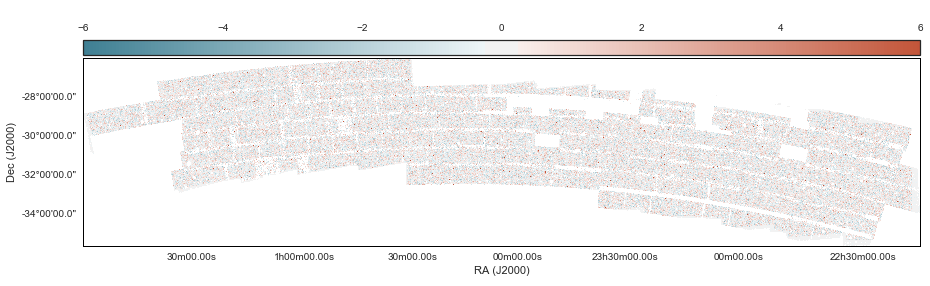

In [21]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 5))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_psw_SGP_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


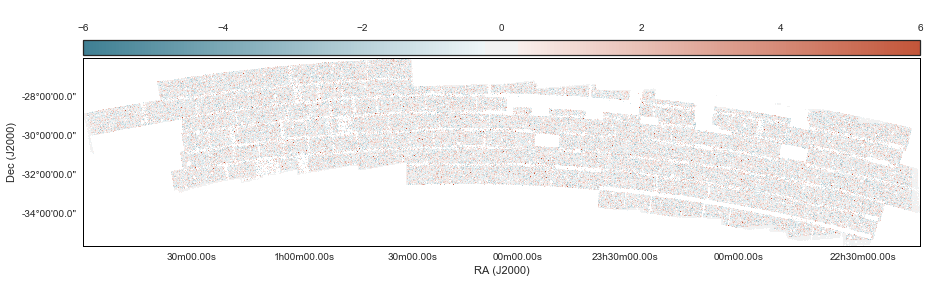

In [22]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 5))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_pmw_SGP_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


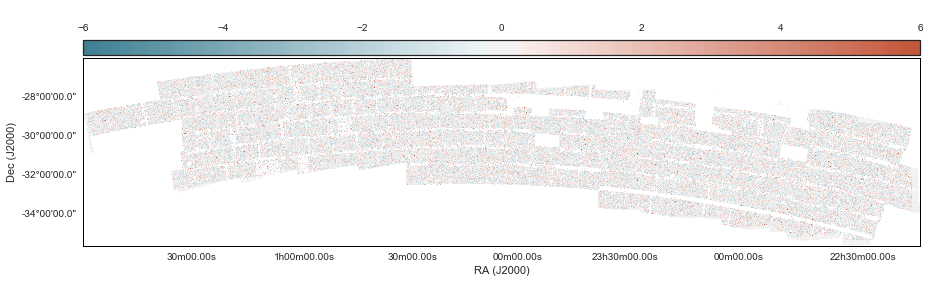

In [23]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15, 5))
Bayes_p_map=aplpy.FITSFigure('./data/dmu26_XID+SPIRE_plw_SGP_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')